# Classez des images : 
Ce notebook contient l'analyse et le prétraitement d'images

### Rappel du contexte : 
Notre mission est de réaliser un algorithme de détection de la race de chien sur une photo pour l'association Le Refuge.

Les données sont issues du site  Stanford Dogs Dataset. Celles-ci sont réparties sur 120 dossiers (un dossier par race). 

## Analyses et prétraitements réalisés dans ce notebook : 

#### 1. Split des données : 
train (75%), validation (15%) et test (10%)
#### 2. Visualisation d'images : 
Visualisation d'images aléatoires parmi  les trois premières classes
#### 3. Analyse des dimensions des images : 
Le nombre de dimension unique dans l'ensemble des images
#### 4. Augmentation des données : 
Quelques exemples. La data augmentation sera incorporée directement au modèle en cas d'overfiting. 

### Librairies 

!pip install scikit-learn

In [2]:
import os
import shutil
from sklearn.model_selection import train_test_split
import scipy.io
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import cv2

2024-02-28 12:11:39.489740: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-02-28 12:11:39.510749: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-28 12:11:39.619676: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-28 12:11:39.619709: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-28 12:11:39.635888: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to

from keras.preprocessing.image import load_img
from keras_cv.layers import Resizing

## 1. Split :

!pip install --upgrade keras

In [26]:
# Définir le répertoire contenant les images
images_dir = "Images"

# Définir les répertoires de sortie pour train, validation et test
train_dir = "data/train"
val_dir = "data/val"
test_dir = "data/test"

# Créer les répertoires s'ils n'existent pas déjà
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Charger les listes de fichiers d'entraînement et de test depuis les fichiers .mat
train_data = scipy.io.loadmat("train_list.mat")['file_list']
test_data = scipy.io.loadmat("test_list.mat")['file_list']

In [27]:
# Convertir les listes en ensembles
# train_set = set(train_list.flatten().tolist())  # Convertir en liste puis en ensemble - ne fonctionne pas
# test_set = set(test_list.flatten().tolist())  # Convertir en liste puis en ensemble - ne fonctionne pas

# Extraire les noms de classes
train_list = [item[0].split('/')[0] for sublist in train_data for item in sublist]
test_list = [item[0].split('/')[0] for sublist in test_data for item in sublist]

In [29]:
print("Classes dans train_list:", train_list)
# print("Classes dans test_list:", test_list)
# print("Sous-répertoires dans images_dir:", os.listdir(images_dir))

Classes dans train_list: ['n02085620-Chihuahua', 'n02085620-Chihuahua', 'n02085620-Chihuahua', 'n02085620-Chihuahua', 'n02085620-Chihuahua', 'n02085620-Chihuahua', 'n02085620-Chihuahua', 'n02085620-Chihuahua', 'n02085620-Chihuahua', 'n02085620-Chihuahua', 'n02085620-Chihuahua', 'n02085620-Chihuahua', 'n02085620-Chihuahua', 'n02085620-Chihuahua', 'n02085620-Chihuahua', 'n02085620-Chihuahua', 'n02085620-Chihuahua', 'n02085620-Chihuahua', 'n02085620-Chihuahua', 'n02085620-Chihuahua', 'n02085620-Chihuahua', 'n02085620-Chihuahua', 'n02085620-Chihuahua', 'n02085620-Chihuahua', 'n02085620-Chihuahua', 'n02085620-Chihuahua', 'n02085620-Chihuahua', 'n02085620-Chihuahua', 'n02085620-Chihuahua', 'n02085620-Chihuahua', 'n02085620-Chihuahua', 'n02085620-Chihuahua', 'n02085620-Chihuahua', 'n02085620-Chihuahua', 'n02085620-Chihuahua', 'n02085620-Chihuahua', 'n02085620-Chihuahua', 'n02085620-Chihuahua', 'n02085620-Chihuahua', 'n02085620-Chihuahua', 'n02085620-Chihuahua', 'n02085620-Chihuahua', 'n020856

In [31]:
len(list(set(train_list)))

120

In [33]:
len(list(set(test_list)))

120

In [34]:
# Supprimer les doublons de train_list et test_list
train_list = list(set(train_list))
test_list = list(set(test_list))

In [35]:
# Parcourir chaque classe dans les listes de fichiers d'entraînement et de test
for class_name in train_list:
    # Chemin complet du dossier de la classe
    class_train_dir = os.path.join(train_dir, class_name)
    class_val_dir = os.path.join(val_dir, class_name)
    class_test_dir = os.path.join(test_dir, class_name)

    # Créer les répertoires de classe s'ils n'existent pas déjà
    os.makedirs(class_train_dir, exist_ok=True)
    os.makedirs(class_val_dir, exist_ok=True)
    os.makedirs(class_test_dir, exist_ok=True)
    
    # Liste des fichiers dans le dossier de la classe
    files = os.listdir(os.path.join(images_dir, class_name))
    
    # Mélanger aléatoirement les fichiers
    random.shuffle(files)
    
    # Diviser les fichiers en train, validation et test
    num_train = int(0.75 * len(files))
    num_val = int(0.15 * len(files))
    train_files = files[:num_train]
    val_files = files[num_train:num_train+num_val]
    test_files = files[num_train+num_val:]
    
# Copier les fichiers dans les répertoires correspondants
    for file in train_files:
        shutil.copy(os.path.join(images_dir, class_name, file), os.path.join(class_train_dir, file))
    for file in val_files:
        shutil.copy(os.path.join(images_dir, class_name, file), os.path.join(class_val_dir, file))
    for file in test_files:
        shutil.copy(os.path.join(images_dir, class_name, file), os.path.join(class_test_dir, file))


In [38]:
# Vérification du nombre d'images par répertoire

train_dir = "data/train"
val_dir = "data/val"
test_dir = "data/test"

# Fonction pour compter le nombre d'images dans un répertoire donné
def count_images(directory):
    return sum([len(files) for _, _, files in os.walk(directory)])

# Affichage des résultats
print(f"Images de train : {count_images(train_dir)} images")
print(f"Images de validation : {count_images(val_dir)} images")
print(f"Images de test : {count_images(test_dir)} images")


Images de train : 15394 images
Images de validation : 3025 images
Images de test : 2161 images


## 2. Visualisation d'un échantillon d'images :

Nous visualisons 4 images aléatoires parmi les trois première classes des données d'entraînement

!pip install opencv-python

In [46]:
train_list[:3]

['n02099429-curly-coated_retriever',
 'n02097047-miniature_schnauzer',
 'n02090379-redbone']

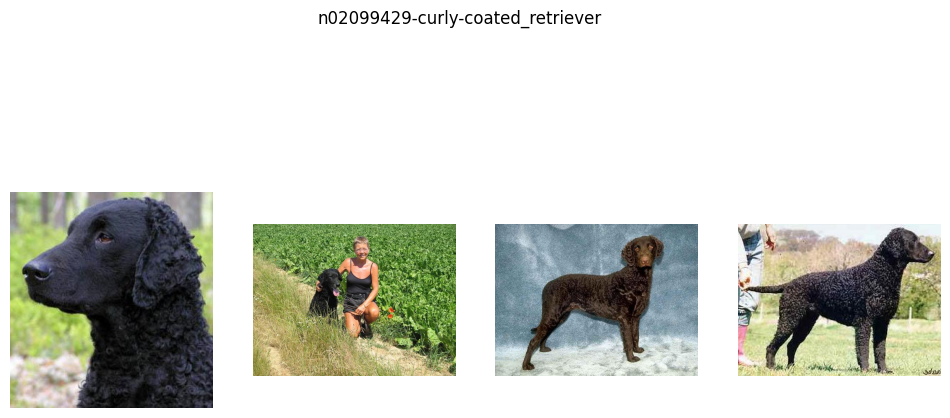

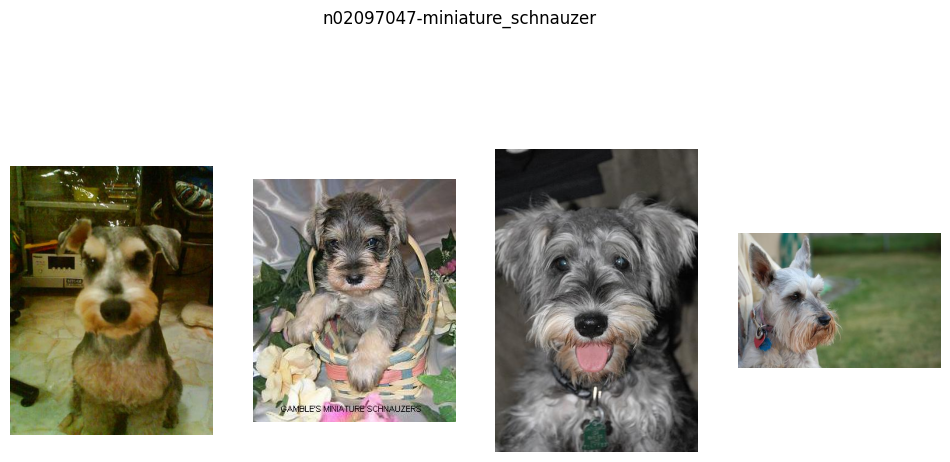

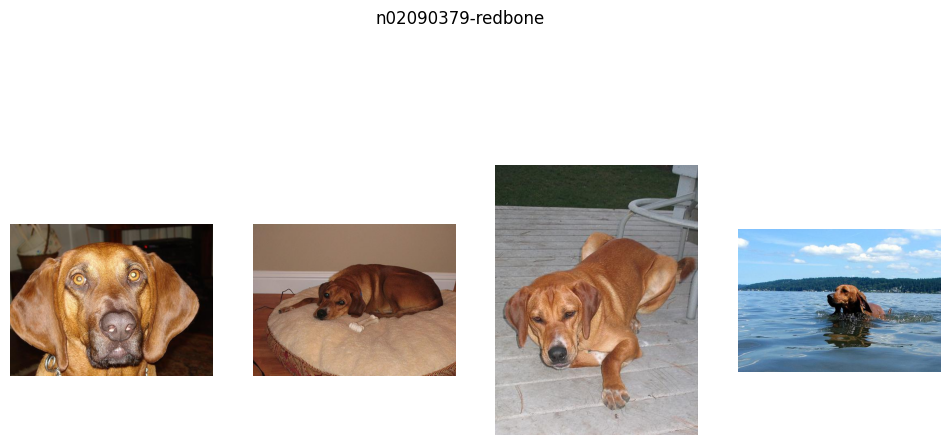

In [57]:
train_dir = "data/train"

# Nombre d'échantillons à afficher par classe
samples_per_class = 4

# Classes à visualiser
classes_to_visualize = train_list[:3]

# Parcourir chaque classe à visualiser
for class_name in classes_to_visualize:
    # Chemin complet du répertoire de la classe
    class_dir = os.path.join(train_dir, class_name)
    
    # Récupérer les noms aléatoires d'échantillons d'images pour la classe
    sample_images = random.sample(os.listdir(class_dir), samples_per_class)
    
    # Afficher les échantillons d'images pour la classe
    plt.figure(figsize=(12, 6))
    plt.suptitle(class_name)
    for i, image_name in enumerate(sample_images, 1):
        image_path = os.path.join(class_dir, image_name)
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convertir de BGR à RGB pour Matplotlib
        plt.subplot(1, samples_per_class, i)
        plt.imshow(image)
        plt.axis('off')
    plt.show()

## 3. Analyse de dimensions des images :

In [67]:
# Liste pour stocker les dimensions des images
image_dimensions = []

# Parcourir chaque classe parmi les trois choisies
for class_name in classes_to_visualize:
    class_dir = os.path.join(train_dir, class_name)
    for image_name in os.listdir(class_dir):
        image_path = os.path.join(class_dir, image_name)
        # Lire l'image et obtenir ses dimensions
        image = cv2.imread(image_path)
        height, width, channels = image.shape
        # Ajouter les dimensions à la liste
        image_dimensions.append((width, height, channels))

# Afficher les dimensions uniques des images issues des trois premières classes
unique_dimensions = set(image_dimensions)
print("Nombre de dimensions uniques des 3 premières classes:", len(unique_dimensions))
print("Dimensions uniques des images :")
for dim in unique_dimensions:
    print(dim)

Nombre de dimensions uniques des 3 premières classes: 156
Dimensions uniques des images :
(500, 350, 3)
(250, 212, 3)
(415, 500, 3)
(350, 258, 3)
(500, 363, 3)
(500, 407, 3)
(216, 453, 3)
(261, 313, 3)
(321, 240, 3)
(500, 431, 3)
(312, 326, 3)
(358, 335, 3)
(472, 354, 3)
(342, 500, 3)
(500, 261, 3)
(500, 327, 3)
(500, 393, 3)
(175, 248, 3)
(500, 448, 3)
(392, 308, 3)
(345, 346, 3)
(139, 200, 3)
(363, 432, 3)
(369, 500, 3)
(162, 120, 3)
(896, 608, 3)
(500, 333, 3)
(312, 239, 3)
(500, 410, 3)
(450, 342, 3)
(228, 225, 3)
(198, 200, 3)
(213, 320, 3)
(400, 300, 3)
(398, 600, 3)
(700, 519, 3)
(160, 200, 3)
(288, 234, 3)
(350, 337, 3)
(300, 225, 3)
(441, 378, 3)
(450, 253, 3)
(334, 500, 3)
(640, 453, 3)
(261, 216, 3)
(500, 374, 3)
(360, 353, 3)
(500, 334, 3)
(240, 180, 3)
(500, 283, 3)
(500, 338, 3)
(393, 500, 3)
(244, 309, 3)
(280, 280, 3)
(460, 613, 3)
(661, 532, 3)
(500, 351, 3)
(600, 463, 3)
(450, 338, 3)
(170, 205, 3)
(289, 288, 3)
(492, 500, 3)
(596, 477, 3)
(268, 276, 3)
(381, 500, 3)


In [68]:
# Dimensions de l'ensemble des images
# Chemin vers le répertoire contenant toutes les images
images_dir = "Images"

# Liste pour stocker les dimensions des images
total_image_dimensions = []

# Parcourir chaque image dans le répertoire
for class_name in os.listdir(images_dir):
    class_dir = os.path.join(images_dir, class_name)
    for image_name in os.listdir(class_dir):
        image_path = os.path.join(class_dir, image_name)
        # Lire l'image et obtenir ses dimensions
        image = cv2.imread(image_path)
        height, width, channels = image.shape
        # Ajouter les dimensions à la liste
        total_image_dimensions.append((width, height, channels))

# Afficher les dimensions uniques des images
total_unique_dimensions = set(total_image_dimensions)
print("Nombre total de dimensions uniques :", len(total_unique_dimensions))

Nombre total de dimensions uniques : 4542


## 4. Data augmentation :
Exemple de data augmentation sur les trois classe sélectionnées, ici on effectue une symétrie verticale aléatoire

In [118]:
original_images_dir = "data/train"
# Répertoire où enregistrer les images augmentées
augmented_images_dir = "data_augmented"

# Liste des classes sélectionnées pour la data augmentation
# selected_classes = train_list[:3]
selected_classes = ["n02099429-curly-coated_retriever", "n02097047-miniature_schnauzer", "n02090379-redbone"]
# Paramètres de data augmentation
# datagen = ImageDataGenerator() - obsolète

# Créer un ensemble de données TensorFlow
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    original_images_dir,
    class_names=selected_classes,
    batch_size=32,
    image_size=(224, 224),
    shuffle=True
)


Found 339 files belonging to 3 classes.


In [116]:
augmented_dataset = dataset.map(
    lambda x, y: (
        tf.image.random_flip_left_right(x),
        y
    )
)

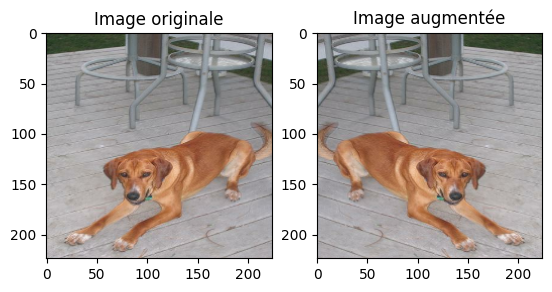

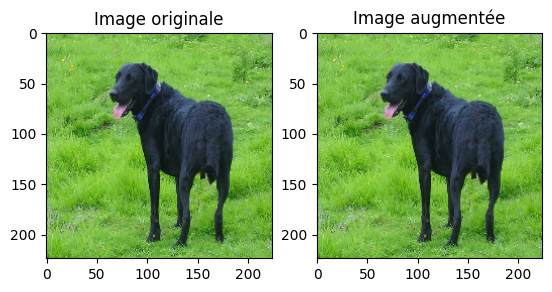

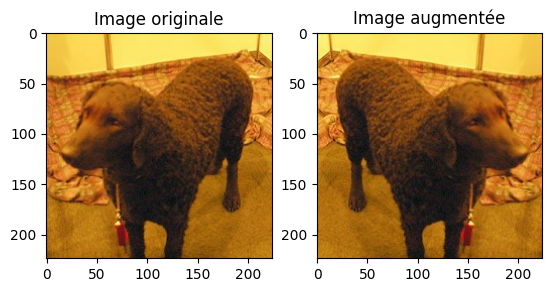

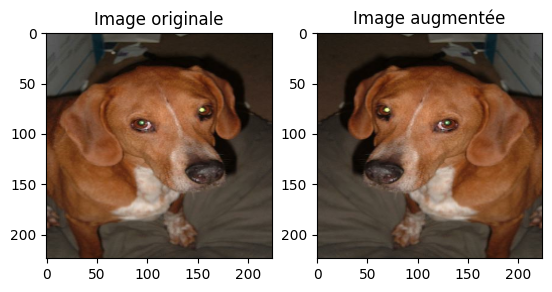

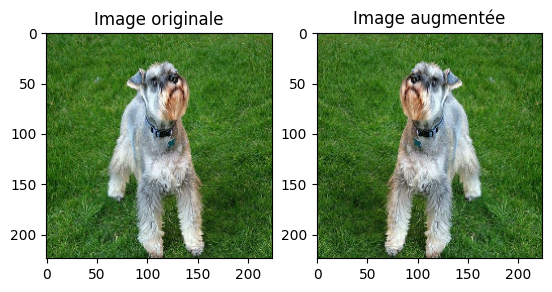

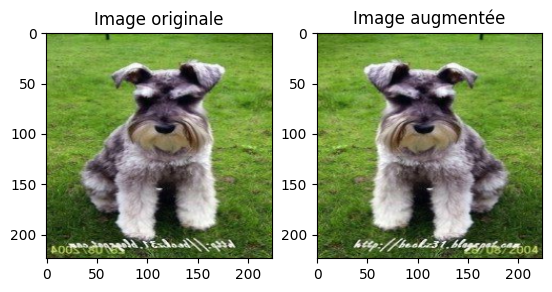

In [120]:
import matplotlib.pyplot as plt

# Initialiser un dictionnaire pour compter le nombre d'exemples par classe
examples_per_class = {class_name: 0 for class_name in selected_classes}

# Parcourir le dataset augmenté
for batch in augmented_dataset:
    for i, (image, label) in enumerate(zip(batch[0], batch[1])):
        class_name = selected_classes[label.numpy()]
        
        # Vérifier si nous avons déjà affiché 2 exemples pour cette classe
        if examples_per_class[class_name] >= 2:
            continue
        
        original_image = image.numpy() / 255.0
        augmented_image = tf.image.random_flip_left_right(image).numpy() / 255.0
        
        # Afficher l'image originale
        plt.subplot(1, 2, 1)
        plt.imshow(original_image)
        plt.title('Image originale')
        
        # Afficher l'image augmentée
        plt.subplot(1, 2, 2)
        plt.imshow(augmented_image)
        plt.title('Image augmentée')
        
        plt.show()
        
        # Incrémenter le nombre d'exemples pour cette classe
        examples_per_class[class_name] += 1
        
        # Vérifier si nous avons atteint le nombre maximal d'exemples pour cette classe
        if examples_per_class[class_name] >= 2:
            break  # Sortir de la boucle interne pour passer à la classe suivante


### Vérification du format des images : 

Test avec une image dont le format n'est pas valide.

In [5]:
# Répertoire contenant toutes les images
images_dir = "Image_test"

# Liste des formats d'images valides
valid_image_formats = [".png", ".jpg", ".jpeg"]

# Parcourir chaque sous-répertoire dans le répertoire principal
for subdir, dirs, files in os.walk(images_dir):
    for filename in files:
        # Vérifier si l'extension de fichier est dans la liste des formats valides
        if os.path.splitext(filename)[1].lower() not in valid_image_formats:
            print(f"Attention : {os.path.join(subdir, filename)} n'est pas une image au format valide.")


Attention : Image_test/test/pexels-photo-12081252.jg n'est pas une image au format valide.


In [7]:
# Répertoire contenant toutes les images
images_dir = "Images"

# Liste des formats d'images valides
valid_image_formats = [".png", ".jpg", ".jpeg"]

# Parcourir chaque sous-répertoire dans le répertoire principal
for subdir, dirs, files in os.walk(images_dir):
    for filename in files:
        # Vérifier si l'extension de fichier est dans la liste des formats valides
        if os.path.splitext(filename)[1].lower() not in valid_image_formats:
            print(f"Attention : {os.path.join(subdir, filename)} n'est pas une image au format valide.")


Ce code confirme que toutes les images sont au format valide.

Les étapes suivante ne sont pas testés dans ce notebook et seront incorporées directement au pipeline du modèle :

    - Normalisation des données 
    - Réduction des dimensions  

Nous passons à présent à la modélisation voir le notebook suivant.

In [8]:
!nvidia-smi

Wed Feb 28 12:29:14 2024       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.147.05   Driver Version: 525.147.05   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  On   | 00000000:01:00.0  On |                  N/A |
|  0%   34C    P8    10W / 130W |    496MiB /  8192MiB |      8%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [11]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  0


2024-02-28 12:31:09.015375: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-02-28 12:31:09.034692: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2256] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [12]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [24]:
print("Version de keras installée :", keras.__version__)
print("Version de tensorflow installée :", tf.__version__)

Version de keras installée : 3.0.5
Version de tensorflow installée : 2.15.0
